In [1]:
#importing the libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#Reading the dataset
dt=pd.read_csv(r"Churn_Modelling.csv")

In [3]:
dt

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Handling missing values
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dt.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
dt.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Removing columns
data=dt.drop(['RowNumber','CustomerId','Surname'],axis=True)

In [8]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
#value counts

In [10]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
data.Age.value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [13]:
data.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [14]:
data.Balance.value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [15]:
data.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [16]:
data.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [17]:
data.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [18]:
data.EstimatedSalary.value_counts()

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [20]:
data.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [21]:
#Exploratory data analysis

In [22]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
#labelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
#data["CreditScore"]=le.fit_transform(data["CreditScore"])
data["Geography"]=le.fit_transform(data["Geography"])
data["Gender"]=le.fit_transform(data["Gender"])
#data["Age"]=le.fit_transform(data["Age"])
#data["Tenure"]=le.fit_transform(data["Tenure"])
#data["Balance"]=le.fit_transform(data["Balance"])
#data["NumOfProducts"]=le.fit_transform(data["NumOfProducts"])
#data["HasCrCard"]=le.fit_transform(data["HasCrCard"])
#data["IsActiveMember"]=le.fit_transform(data["IsActiveMember"])
#data["EstimatedSalary"]=le.fit_transform(data["EstimatedSalary"])
#data["Exited"]=le.fit_transform(data["Exited"])

In [26]:
data.Geography.value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [27]:
data.Gender.value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [28]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [30]:
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

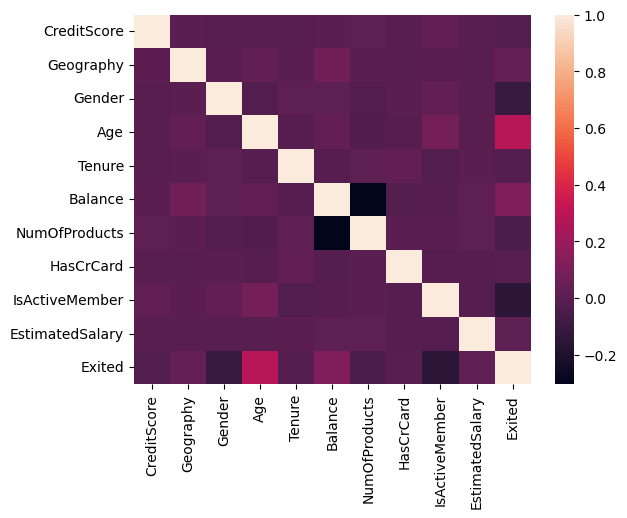

In [31]:
sns.heatmap(data.corr(),annot=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no 

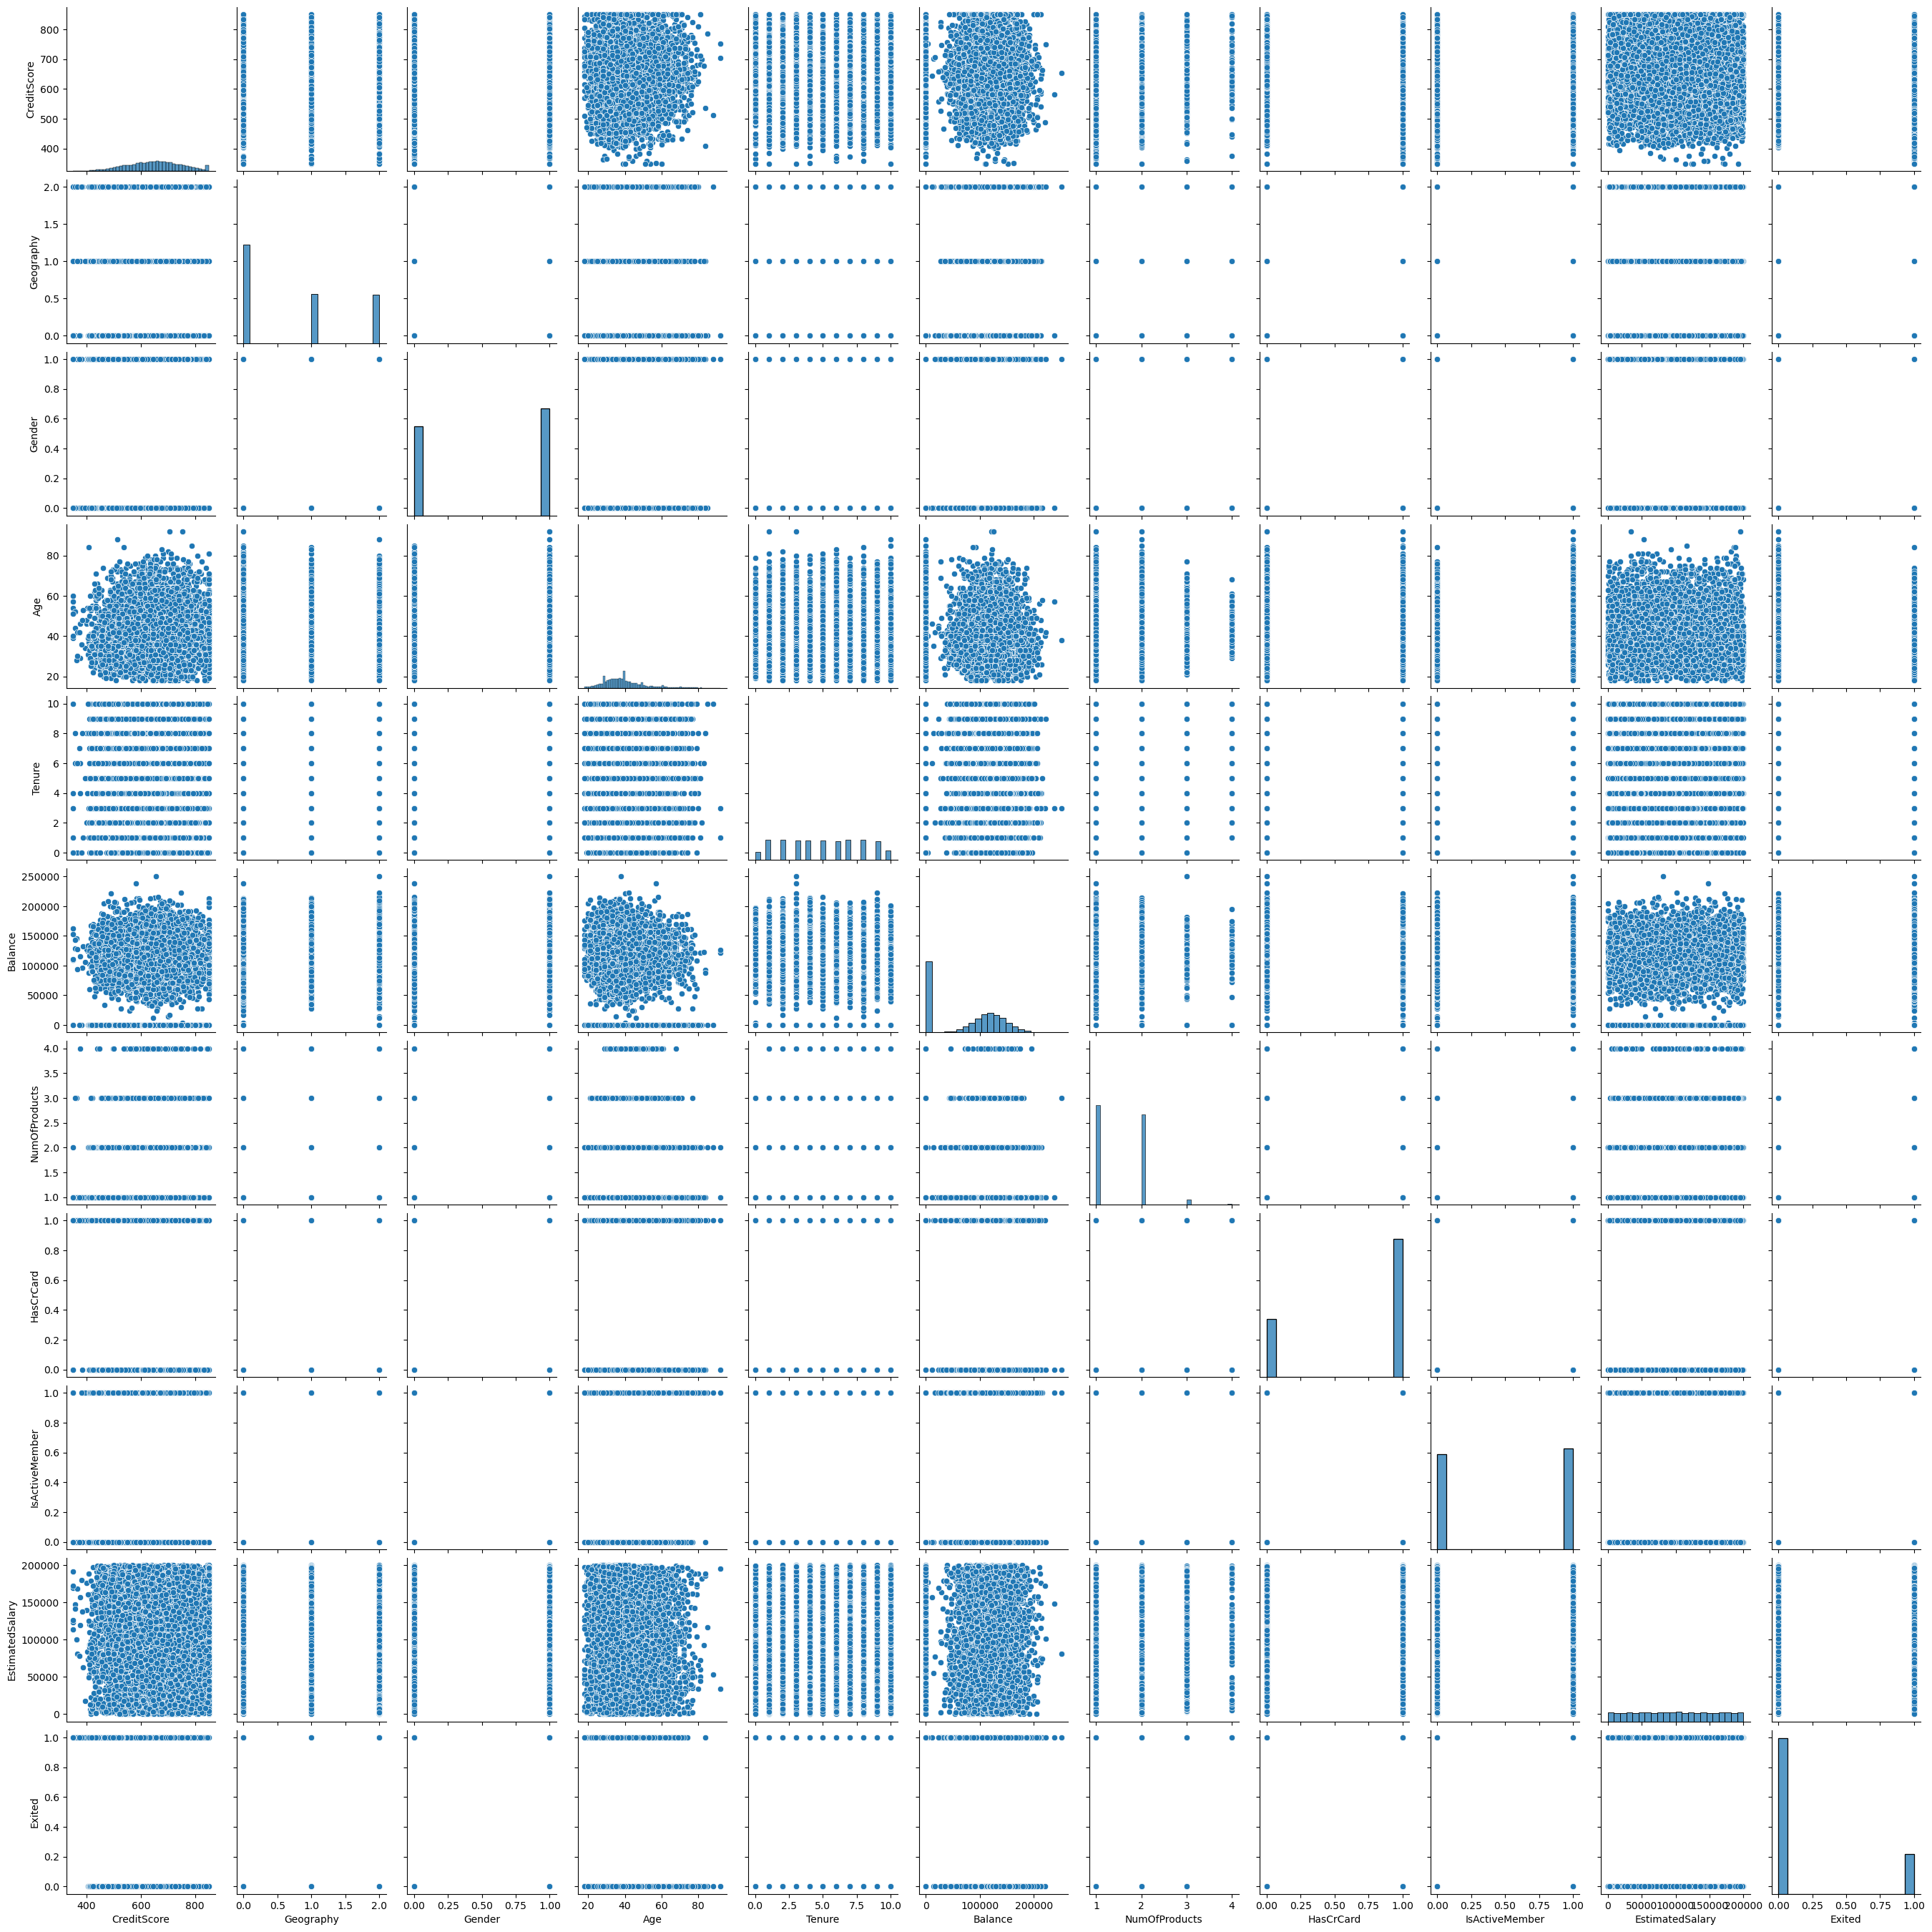

In [32]:
sns.pairplot(data=data,markers=["^","V"],palette="inferno")

In [33]:
#oneHotEncoding

In [34]:
 pd.get_dummies(data, columns=['Geography', 'Gender'])


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [36]:
#splitting the data
x=data.iloc[:,0:10].values
y=data.iloc[:,10:11].values

In [37]:
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [38]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [39]:
x.shape

(10000, 10)

In [40]:
y.shape

(10000, 1)

In [41]:
y=y.reshape(-1)

In [42]:
#training and testing the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
x.shape

(10000, 10)

In [45]:
y.shape

(10000,)

In [46]:
y_train.shape

(8000,)

In [47]:
y_test.shape

(2000,)

In [48]:
y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [49]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
#Model Building

In [51]:
#support Vector Machine
from sklearn.svm import SVC
svm=SVC(kernel="linear")

In [52]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [53]:
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred,y_test)
svm_acc

0.7975

In [54]:
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      2000
   macro avg       0.50      0.40      0.44      2000
weighted avg       1.00      0.80      0.89      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
confusion_matrix(svm_pred,y_test)

array([[1595,  405],
       [   0,    0]], dtype=int64)

In [56]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
accuracy_score(model.predict(x_test),y_test)



0.807

In [57]:
print(classification_report(model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1875
           1       0.18      0.58      0.27       125

    accuracy                           0.81      2000
   macro avg       0.57      0.70      0.58      2000
weighted avg       0.92      0.81      0.85      2000



In [58]:
confusion_matrix(model.predict(x_test),y_test)

array([[1542,  333],
       [  53,   72]], dtype=int64)

In [59]:
model.predict([[619,0,0,42,2,0,1,1,1,101348.88]])

array([1], dtype=int64)

In [60]:
#Decision Tree classifier]
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)  
classifier.fit(x_train, y_train)
pred=classifier.predict(x_test)
dtc_acc=accuracy_score(pred,y_test)
dtc_acc

0.7835

In [61]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1562
           1       0.51      0.47      0.49       438

    accuracy                           0.78      2000
   macro avg       0.68      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000



In [62]:
confusion_matrix(pred,y_test)

array([[1362,  200],
       [ 233,  205]], dtype=int64)

In [63]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(random_state=42)
rc.fit(x_train,y_train)
pred=rc.predict(x_test)
rfc_acc=accuracy_score(y_test,pred)
rfc_acc

0.864

In [64]:
d=[[758,0,0,34,3,0,2,1,1,124226.16]]

In [65]:
input_data_scaled = sc.transform(d)
rc.predict(input_data_scaled)

array([0], dtype=int64)

In [66]:
rfc_con=confusion_matrix(pred,y_test)


rfc_con

array([[1528,  205],
       [  67,  200]], dtype=int64)

In [67]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1733
           1       0.49      0.75      0.60       267

    accuracy                           0.86      2000
   macro avg       0.73      0.82      0.76      2000
weighted avg       0.90      0.86      0.88      2000



In [68]:
from sklearn.metrics import precision_score,accuracy_score
precision_score(y_test,pred)


0.7490636704119851

In [69]:
from sklearn.metrics import mean_squared_error,r2_score

In [70]:
mean_squared_error(y_test,pred)

0.136

In [71]:
r2_score(y_test,pred)

0.15786214636789353

In [72]:
svm.predict([[111,0,0,24,8,5793,2,1,0,5707]])

array([0], dtype=int64)

In [73]:
#kNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [74]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
knn_acc=accuracy_score(knn.predict(x_test),y_test)
knn_acc

0.8345

In [76]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1728
           1       0.43      0.64      0.51       272

    accuracy                           0.83      2000
   macro avg       0.68      0.75      0.71      2000
weighted avg       0.87      0.83      0.85      2000



In [77]:
knn_con=confusion_matrix(knn.predict(x_test),y_test)
knn_con

array([[1496,  232],
       [  99,  173]], dtype=int64)

In [78]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
nb_acc=accuracy_score(gnb.predict(x_test),y_test)
nb_acc

0.8275

In [79]:
print(classification_report(gnb.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1846
           1       0.26      0.69      0.38       154

    accuracy                           0.83      2000
   macro avg       0.62      0.77      0.64      2000
weighted avg       0.92      0.83      0.86      2000



In [80]:
nb_con=confusion_matrix(gnb.predict(x_test),y_test)
nb_con

array([[1548,  298],
       [  47,  107]], dtype=int64)

In [81]:
#model deployment

In [82]:
import  pickle
filename="model.pkl"
pickle.dump(rc,open(filename,"wb"))

In [83]:
model=pickle.load(open(filename,'rb'))

In [84]:
model.score(x_test,y_test)*100

86.4

In [85]:
filename="scaler.pkl"
pickle.dump(sc,open(filename,"wb"))